<img src="images/mcg.jpg", style="width: 100px">


# Linear Gaussian Bayesian Networks (GBNs)

## Generate $x_1$ $x_2$ and $Y$ from a Multivariate Gaussian Distribution with a Mean and a Variance.

What if the inputs to the linear regression were correlated? This often happens in linear dynamical systems. Linear Gaussian Models are useful for modeling probabilistic PCA, factor analysis and linear dynamical systems. Linear Dynamical Systems have variety of uses such as tracking of moving objects. This is an area where Signal Processing methods have a high overlap with Machine Learning methods. When the problem is treated as a state-space problem with added stochasticity, then the future samples depend on the past. The latent parameters, $\beta_i$ where $i \in [1,...,k]$ provide a linear combination of the univariate gaussian distributions as shown in the figure. 

<img src="images/gbn.png", style="width: 400px">

The observed variable, $y_{jx}$ can be described as a sample that is drawn from the conditional distribution:

$$\mathcal{N}(y_{jx} | \sum_{i=1}^k \beta_i^T x_i + \beta_0; \sigma^2)$$

The latent parameters $\beta_is$ and $\sigma^2$ need to be determined. 

In [1]:
# from pgmpy.factors.continuous import LinearGaussianCPD

import sys
import numpy as np
import pgmpy

sys.path.insert(0, "../pgmpy/")
from pgmpy.factors.continuous import LinearGaussianCPD

mu = np.array([7, 13])
sigma = np.array([[4, 3], [3, 6]])

cpd = LinearGaussianCPD(
    "Y", evidence_mean=mu, evidence_variance=sigma, evidence=["X1", "X2"]
)
cpd.variable, cpd.evidence

('Y', ['X1', 'X2'])

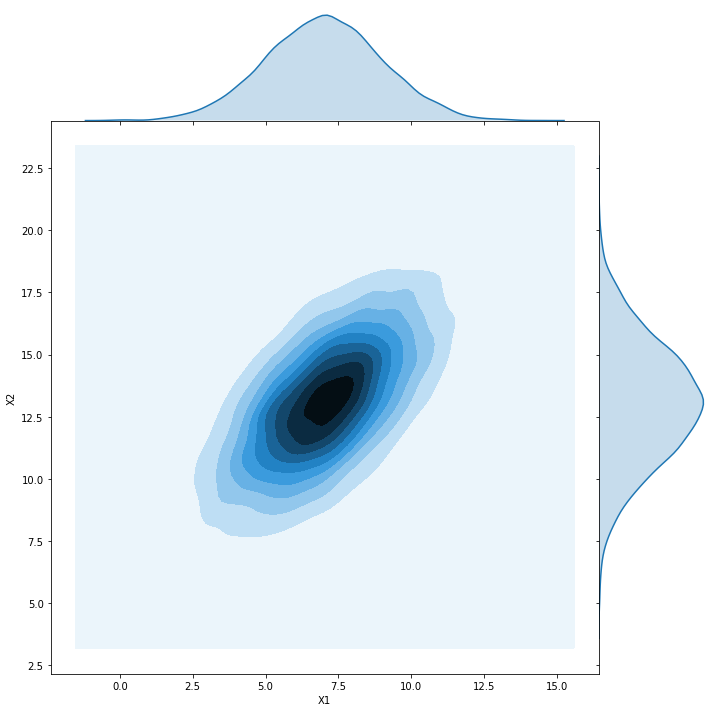

In [2]:
#### import numpy as np
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from matplotlib import pyplot

# Obtain the X and Y which are jointly gaussian from the distribution
mu_x = np.array([7, 13])
sigma_x = np.array([[4, 3], [3, 6]])

# Variables
states = ["X1", "X2"]

# Generate samples from the distribution
X_Norm = multivariate_normal(mean=mu_x, cov=sigma_x)
X_samples = X_Norm.rvs(size=10000)
X_df = pd.DataFrame(X_samples, columns=states)

# Generate
X_df["P_X"] = X_df.apply(X_Norm.pdf, axis=1)
X_df.head()

g = sns.jointplot(X_df["X1"], X_df["X2"], kind="kde", height=10, space=0)

## Linear Gaussian Models - The Process

The linear gaussian model in supervised learning scheme is nothing but a linear regression where inputs are drawn from a jointly gaussian distribution. 

Determining the Latent Parameters via Maximum Likelihood Estimation (MLE)

The samples drawn from the conditional linear gaussian distributions are observed as:

$$ p(Y|X) = \cfrac{1}{\sqrt(2\pi\sigma_c^2} \times exp(\cfrac{(\sum_{i=1}^k \beta_i^T x_i + \beta_0 - x[m])^2}{2\sigma^2})$$

Taking log,

$$ log(p(Y|X)) = (\sum_{i=1}^k[-\cfrac{1}{2}log(2\pi\sigma^2) - \cfrac{1}{2\sigma^2}( \beta_i^T x_i + \beta_0 - x[m])^2)]$$

Differentiating w.r.t $\beta_i$, we can get k+1 linear equations as shown below:


### The Condtional Distribution p(Y|X)

<img src="images/lgm.png", style="width: 700px">

The betas can easily be estimated by inverting the coefficient matrix and multiplying it to the right-hand side.

/Users/harishkashyap/Documents/MCG/pgmpy/venv/lib/python3.6/site-packages/scipy-1.1.0-py3.6-macosx-10.7-x86_64.egg/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


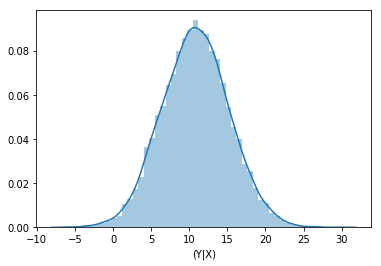

In [5]:
beta_vec = np.array([0.7, 0.3])
beta_0 = 2
sigma_c = 4


def genYX(x):
    x = [x["X1"], x["X2"]]
    var_mean = np.dot(beta_vec.transpose(), x) + beta_0
    Yx_sample = np.random.normal(var_mean, sigma_c, 1)
    return Yx_sample[0]


X_df["(Y|X)"] = X_df.apply(genYX, axis=1)
X_df.head()

sns.distplot(X_df["(Y|X)"])
# X_df.to_csv('gbn_values.csv', index=False)

In [4]:
cpd.fit(X_df, states=["(Y|X)", "X1", "X2"], estimator="MLE")

(Y|X)    108620.019971
X1        70061.804718
X2       130484.483348
dtype: float64
[108620.0199709961]
         b0_coef  b1_coef      b2_coef
0   10000.000000  70061.8       130484
1   70061.804718   530593       943171
2  130484.483348   943171  1.76157e+06


(array([1.75405452, 0.69412373, 0.32531005]), 4.045369149779373)


For any questions feel free to contact hkashyap [at] icloud.com. Thanks to Praveen Kaushik for the diagrams(diagram.ai), Kiran Byadarhaly and Karthik Chandrashekhar for proof reading the math.